## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation

In [1205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding and Exploration

In [1075]:
# reading the dataset
house_price = pd.read_csv("train.csv")

In [1076]:
# summary of the dataset: 1460 rows, 81 columns
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1077]:
house_price[house_price.columns[0:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [1078]:
house_price[house_price.columns[20:40]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   RoofStyle     1460 non-null   object 
 2   RoofMatl      1460 non-null   object 
 3   Exterior1st   1460 non-null   object 
 4   Exterior2nd   1460 non-null   object 
 5   MasVnrType    1452 non-null   object 
 6   MasVnrArea    1452 non-null   float64
 7   ExterQual     1460 non-null   object 
 8   ExterCond     1460 non-null   object 
 9   Foundation    1460 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  BsmtCond      1423 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtFinSF1    1460 non-null   int64  
 15  BsmtFinType2  1422 non-null   object 
 16  BsmtFinSF2    1460 non-null   int64  
 17  BsmtUnfSF     1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [1079]:
house_price[house_price.columns[40:60]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HeatingQC     1460 non-null   object 
 1   CentralAir    1460 non-null   object 
 2   Electrical    1459 non-null   object 
 3   1stFlrSF      1460 non-null   int64  
 4   2ndFlrSF      1460 non-null   int64  
 5   LowQualFinSF  1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   BsmtFullBath  1460 non-null   int64  
 8   BsmtHalfBath  1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  HalfBath      1460 non-null   int64  
 11  BedroomAbvGr  1460 non-null   int64  
 12  KitchenAbvGr  1460 non-null   int64  
 13  KitchenQual   1460 non-null   object 
 14  TotRmsAbvGrd  1460 non-null   int64  
 15  Functional    1460 non-null   object 
 16  Fireplaces    1460 non-null   int64  
 17  FireplaceQu   770 non-null    object 
 18  GarageType    1379 non-null 

In [1080]:
house_price[house_price.columns[60:81]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageFinish   1379 non-null   object
 1   GarageCars     1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   GarageQual     1379 non-null   object
 4   GarageCond     1379 non-null   object
 5   PavedDrive     1460 non-null   object
 6   WoodDeckSF     1460 non-null   int64 
 7   OpenPorchSF    1460 non-null   int64 
 8   EnclosedPorch  1460 non-null   int64 
 9   3SsnPorch      1460 non-null   int64 
 10  ScreenPorch    1460 non-null   int64 
 11  PoolArea       1460 non-null   int64 
 12  PoolQC         7 non-null      object
 13  Fence          281 non-null    object
 14  MiscFeature    54 non-null     object
 15  MiscVal        1460 non-null   int64 
 16  MoSold         1460 non-null   int64 
 17  YrSold         1460 non-null   int64 
 18  SaleType       1460 non-null

In [1081]:
# head
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [1082]:
# MSSubClass: Identifies the type of dwelling involved in the sale.	

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

house_price.MSSubClass.astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [1083]:
# MSZoning: Identifies the general zoning classification of the sale.
		
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density
house_price.MSZoning.astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

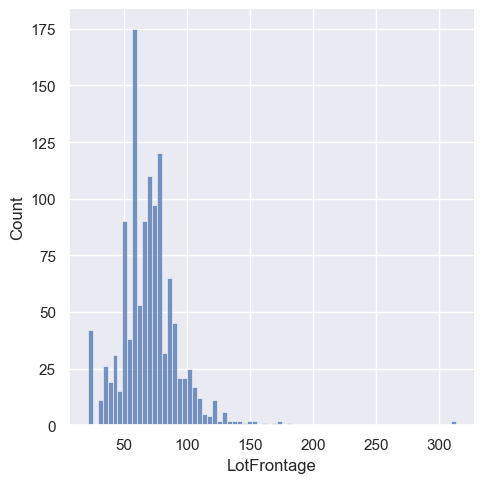

In [1084]:
# LotFrontage: Linear feet of street connected to property
sns.displot(house_price.LotFrontage)
plt.show()

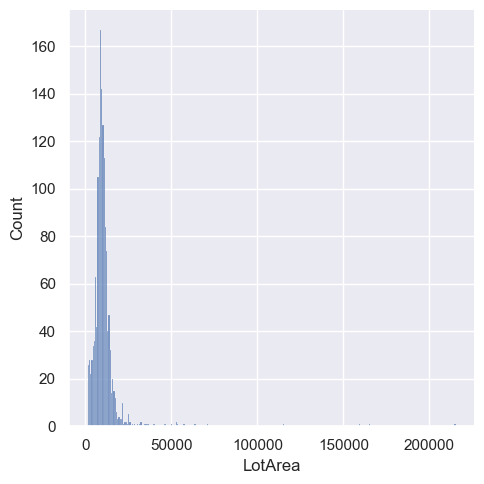

In [1085]:
# LotArea: Lot size in square feet
sns.displot(house_price.LotArea)
plt.show()

In [1086]:
# Street: Type of road access to property

#        Grvl	Gravel	
#        Pave	Paved
house_price.astype('category').Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [1087]:
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access
house_price.Alley.astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1088]:
# LotShape: General shape of property

#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
house_price.LotShape.astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1089]:
# LandContour: Flatness of the property

#        Lvl	Near Flat/Level	
#        Bnk	Banked - Quick and significant rise from street grade to building
#        HLS	Hillside - Significant slope from side to side
#        Low	Depression
house_price.LandContour.astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [1090]:
# Utilities: Type of utilities available
		
#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only	
house_price.Utilities.astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1091]:
# LotConfig: Lot configuration

#        Inside	Inside lot
#        Corner	Corner lot
#        CulDSac	Cul-de-sac
#        FR2	Frontage on 2 sides of property
#        FR3	Frontage on 3 sides of property
house_price.LotConfig.astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [1092]:
# LandSlope: Slope of property
		
#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope
house_price.LandSlope.astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [1093]:
# Neighborhood: Physical locations within Ames city limits

#        Blmngtn	Bloomington Heights
#        Blueste	Bluestem
#        BrDale	Briardale
#        BrkSide	Brookside
#        ClearCr	Clear Creek
#        CollgCr	College Creek
#        Crawfor	Crawford
#        Edwards	Edwards
#        Gilbert	Gilbert
#        IDOTRR	Iowa DOT and Rail Road
#        MeadowV	Meadow Village
#        Mitchel	Mitchell
#        Names	North Ames
#        NoRidge	Northridge
#        NPkVill	Northpark Villa
#        NridgHt	Northridge Heights
#        NWAmes	Northwest Ames
#        OldTown	Old Town
#        SWISU	South & West of Iowa State University
#        Sawyer	Sawyer
#        SawyerW	Sawyer West
#        Somerst	Somerset
#        StoneBr	Stone Brook
#        Timber	Timberland
#        Veenker	Veenker
house_price.Neighborhood.astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [1094]:
# Condition1: Proximity to various conditions
	
#        Artery	Adjacent to arterial street
#        Feedr	Adjacent to feeder street	
#        Norm	Normal	
#        RRNn	Within 200' of North-South Railroad
#        RRAn	Adjacent to North-South Railroad
#        PosN	Near positive off-site feature--park, greenbelt, etc.
#        PosA	Adjacent to postive off-site feature
#        RRNe	Within 200' of East-West Railroad
#        RRAe	Adjacent to East-West Railroad
house_price.Condition1.astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [1095]:
# Condition2: Proximity to various conditions (if more than one is present)
		
#        Artery	Adjacent to arterial street
#        Feedr	Adjacent to feeder street	
#        Norm	Normal	
#        RRNn	Within 200' of North-South Railroad
#        RRAn	Adjacent to North-South Railroad
#        PosN	Near positive off-site feature--park, greenbelt, etc.
#        PosA	Adjacent to postive off-site feature
#        RRNe	Within 200' of East-West Railroad
#        RRAe	Adjacent to East-West Railroad
house_price.Condition2.astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [1096]:
# BldgType: Type of dwelling
		
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
house_price.BldgType.astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [1097]:
# HouseStyle: Style of dwelling
	
#        1Story	One story
#        1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished
#        SFoyer	Split Foyer
#        SLvl	Split Level
house_price.HouseStyle.astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [1098]:
# OverallQual: Rates the overall material and finish of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor
house_price.OverallQual.astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [1099]:
# OverallCond: Rates the overall condition of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average	
#        5	Average
#        4	Below Average	
#        3	Fair
#        2	Poor
#        1	Very Poor
house_price.OverallCond.astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [1100]:
# YearBuilt: Original construction date
house_price.YearBuilt.astype('category').value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64

In [1101]:
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
house_price.YearRemodAdd.astype('category').value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1986      5
1952      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [1102]:
# RoofStyle: Type of roof

#        Flat	Flat
#        Gable	Gable
#        Gambrel	Gabrel (Barn)
#        Hip	Hip
#        Mansard	Mansard
#        Shed	Shed
house_price.RoofStyle.astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [1103]:
# RoofMatl: Roof material

#        ClyTile	Clay or Tile
#        CompShg	Standard (Composite) Shingle
#        Membran	Membrane
#        Metal	Metal
#        Roll	Roll
#        Tar&Grv	Gravel & Tar
#        WdShake	Wood Shakes
#        WdShngl	Wood Shingles
house_price.RoofMatl.astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [1104]:
# Exterior1st: Exterior covering on house

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast	
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
house_price.Exterior1st.astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [1105]:
# Exterior2nd: Exterior covering on house (if more than one material)

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
house_price.Exterior2nd.astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [1106]:
# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone
house_price.MasVnrType.astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

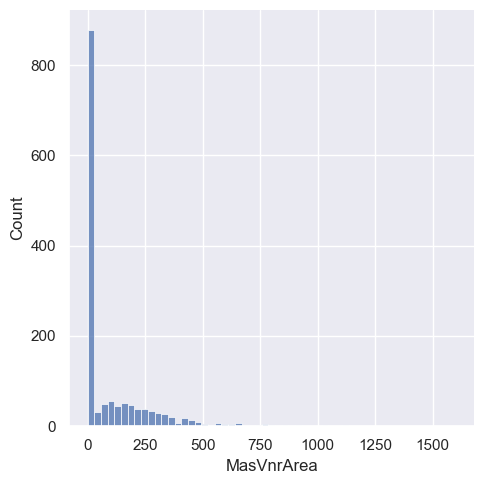

In [1107]:
# MasVnrArea: Masonry veneer area in square feet
sns.displot(house_price.MasVnrArea)
plt.show()

In [1108]:
# ExterQual: Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
house_price.ExterQual.astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [1109]:
# ExterCond: Evaluates the present condition of the material on the exterior
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
house_price.ExterCond.astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1110]:
# Foundation: Type of foundation
		
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood
house_price.Foundation.astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1111]:
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement
house_price.BsmtQual.astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1112]:
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement
house_price.BsmtCond.astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1113]:
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement
house_price.BsmtExposure.astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1114]:
# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
house_price.BsmtFinType1.astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

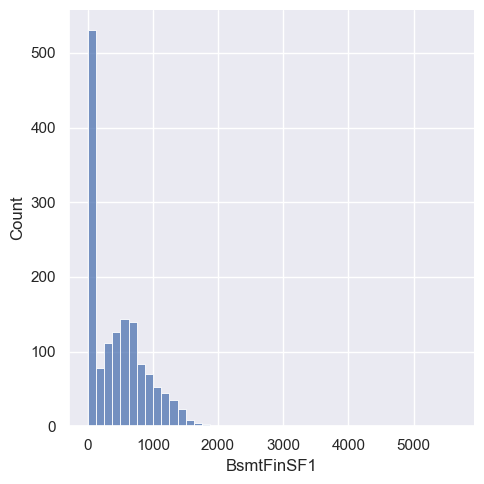

In [1115]:
# BsmtFinSF1: Type 1 finished square feet
sns.displot(house_price.BsmtFinSF1)
plt.show()

In [1116]:
# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
house_price.BsmtFinType2.astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

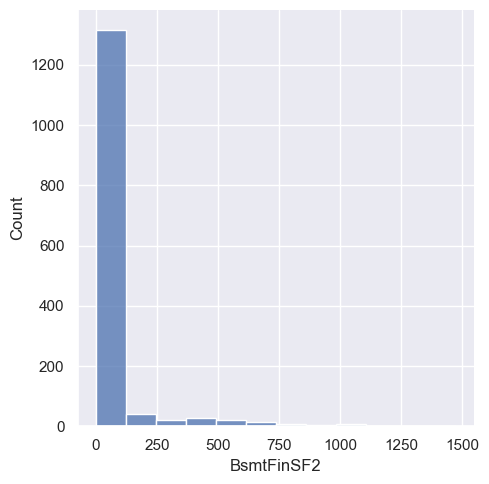

In [1117]:
# BsmtFinSF2: Type 2 finished square feet
sns.displot(house_price.BsmtFinSF2)
plt.show()

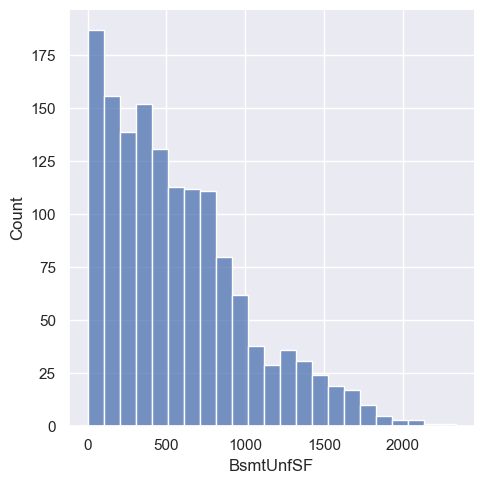

In [1118]:
# BsmtUnfSF: Unfinished square feet of basement area
sns.displot(house_price.BsmtUnfSF)
plt.show()

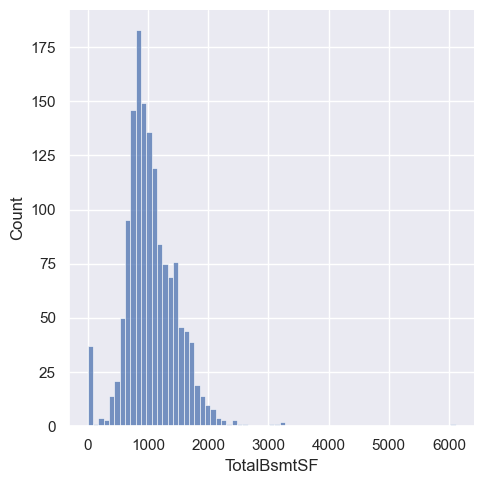

In [1119]:
# TotalBsmtSF: Total square feet of basement area
sns.displot(house_price.TotalBsmtSF)
plt.show()

In [1120]:
# Heating: Type of heating
		
#        Floor	Floor Furnace
#        GasA	Gas forced warm air furnace
#        GasW	Gas hot water or steam heat
#        Grav	Gravity furnace	
#        OthW	Hot water or steam heat other than gas
#        Wall	Wall furnace
house_price.Heating.astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [1121]:
# HeatingQC: Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
house_price.HeatingQC.astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1122]:
# CentralAir: Central air conditioning

#        N	No
#        Y	Yes
house_price.CentralAir.astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [1123]:
# Electrical: Electrical system

#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed
house_price.Electrical.astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

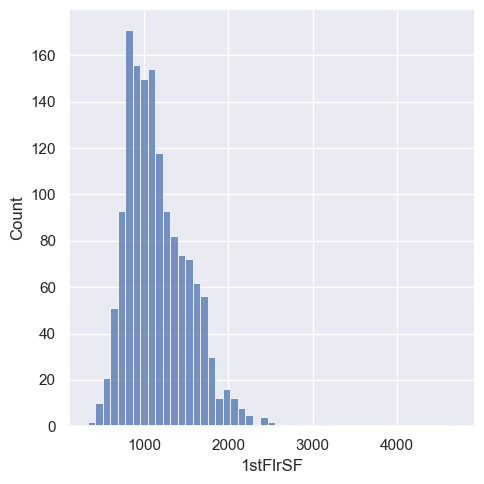

In [1124]:
# 1stFlrSF: First Floor square feet
sns.displot(house_price['1stFlrSF'])
plt.show()

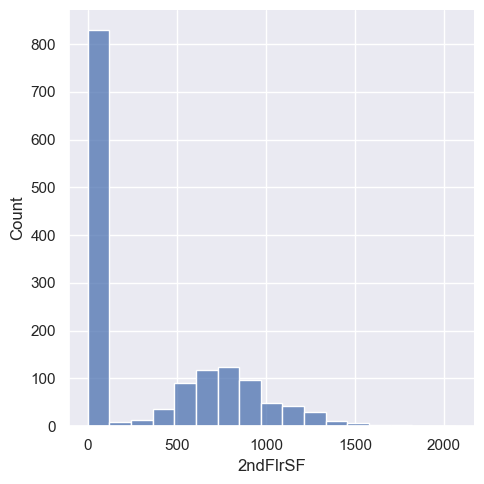

In [1125]:
# 2ndFlrSF: Second floor square feet
sns.displot(house_price['2ndFlrSF'])
plt.show()

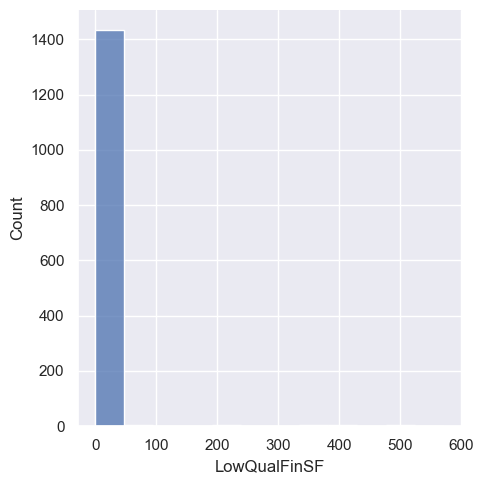

In [1126]:
# LowQualFinSF: Low quality finished square feet (all floors)
sns.displot(house_price.LowQualFinSF)
plt.show()

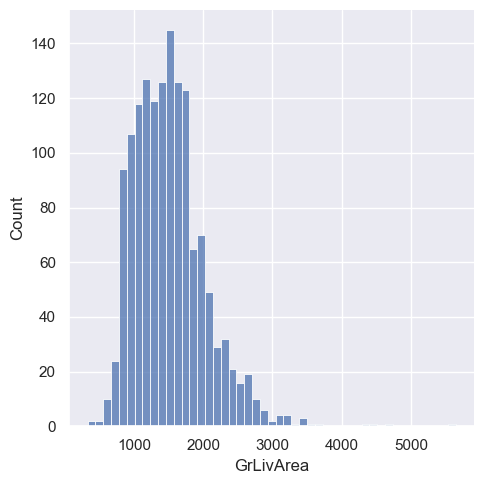

In [1127]:
# GrLivArea: Above grade (ground) living area square feet
sns.displot(house_price.GrLivArea)
plt.show()

In [1128]:
# BsmtFullBath: Basement full bathrooms
house_price.BsmtFullBath.astype('category').value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [1129]:
# BsmtHalfBath: Basement half bathrooms
house_price.BsmtHalfBath.astype('category').value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [1130]:
# FullBath: Full bathrooms above grade
house_price.FullBath.astype('category').value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [1131]:
# HalfBath: Half baths above grade
house_price.HalfBath.astype('category').value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [1132]:
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
house_price.BedroomAbvGr.astype('category').value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [1133]:
# Kitchen: Kitchens above grade
house_price.KitchenAbvGr.astype('category').value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [1134]:
# KitchenQual: Kitchen quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
house_price.KitchenQual.astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [1135]:
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
house_price.TotRmsAbvGrd.astype('category').value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [1136]:
# Functional: Home functionality (Assume typical unless deductions are warranted)

#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only
house_price.Functional.astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1137]:
# Fireplaces: Number of fireplaces
house_price.Fireplaces.astype('category').value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [1138]:
# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace
house_price.FireplaceQu.astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1139]:
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage
house_price.GarageType.astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1140]:
# GarageYrBlt: Year garage was built
house_price.GarageYrBlt.astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1906.0     1
1927.0     1
1933.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [1141]:
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage
house_price.GarageFinish.astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1142]:
# GarageCars: Size of garage in car capacity
house_price.GarageCars.astype('category').value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

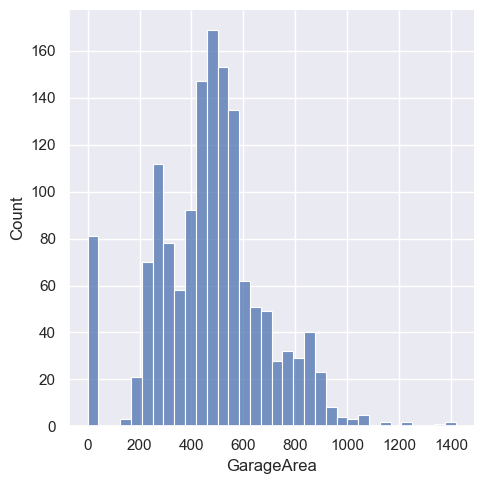

In [1143]:
# GarageArea: Size of garage in square feet
sns.displot(house_price.GarageArea)
plt.show()

In [1144]:
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
house_price.GarageQual.astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [1145]:
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
house_price.GarageCond.astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1146]:
# PavedDrive: Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
house_price.PavedDrive.astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

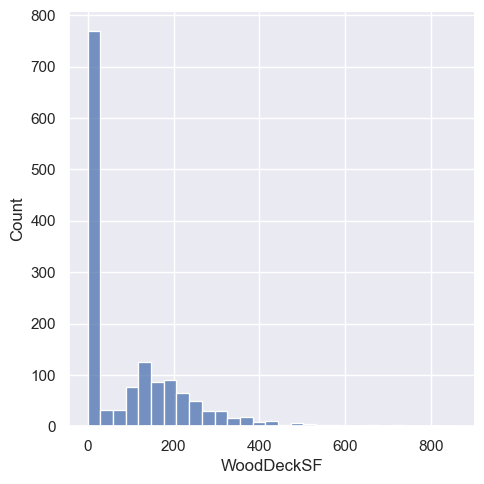

In [1147]:
# WoodDeckSF: Wood deck area in square feet
sns.displot(house_price.WoodDeckSF)
plt.show()

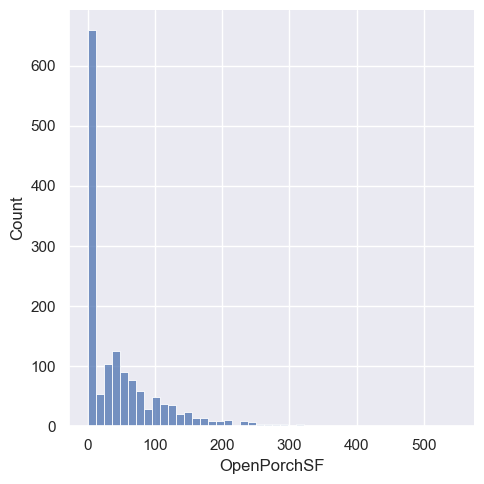

In [1148]:
# OpenPorchSF: Open porch area in square feet
sns.displot(house_price.OpenPorchSF)
plt.show()

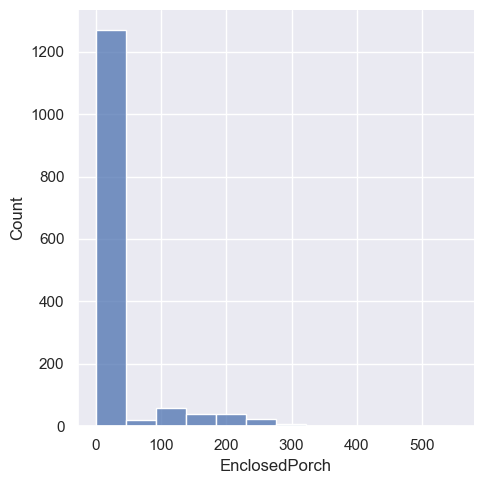

In [1149]:
# EnclosedPorch: Enclosed porch area in square feet
sns.displot(house_price.EnclosedPorch)
plt.show()

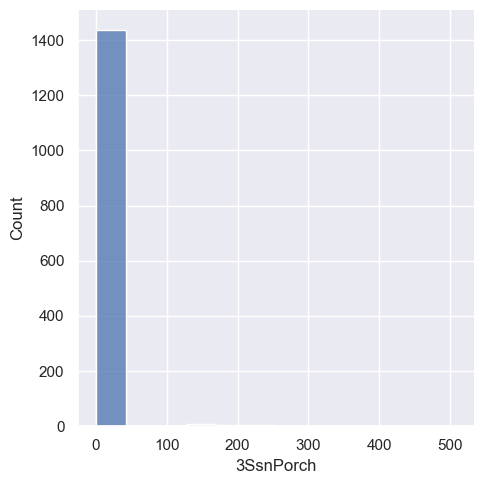

In [1150]:
# 3SsnPorch: Three season porch area in square feet
sns.displot(house_price['3SsnPorch'])
plt.show()

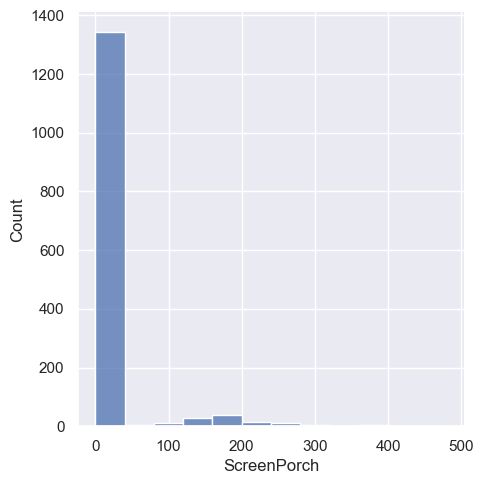

In [1151]:
# ScreenPorch: Screen porch area in square feet
sns.displot(house_price.ScreenPorch)
plt.show()

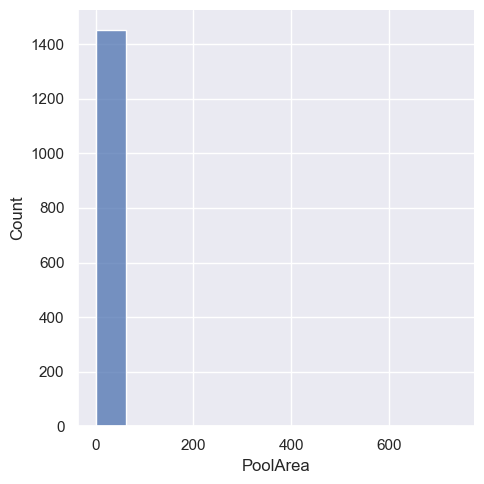

In [1152]:
# PoolArea: Pool area in square feet
sns.displot(house_price.PoolArea)
plt.show()

In [1153]:
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool
house_price.PoolQC.astype('category').value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [1154]:
# Fence: Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence
house_price.Fence.astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1155]:
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None
house_price.MiscFeature.astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [1156]:
# MiscVal: $Value of miscellaneous feature
house_price.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [1157]:
# MoSold: Month Sold (MM)
house_price.MoSold.astype('category').value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [1158]:
# YrSold: Year Sold (YYYY)
house_price.YrSold.astype('category').value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [1159]:
# SaleType: Type of sale
		
#        WD 	Warranty Deed - Conventional
#        CWD	Warranty Deed - Cash
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold
#        COD	Court Officer Deed/Estate
#        Con	Contract 15% Down payment regular terms
#        ConLw	Contract Low Down payment and low interest
#        ConLI	Contract Low Interest
#        ConLD	Contract Low Down
#        Oth	Other
house_price.SaleType.astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [1160]:
# SaleCondition: Condition of sale

#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)
house_price.SaleCondition.astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

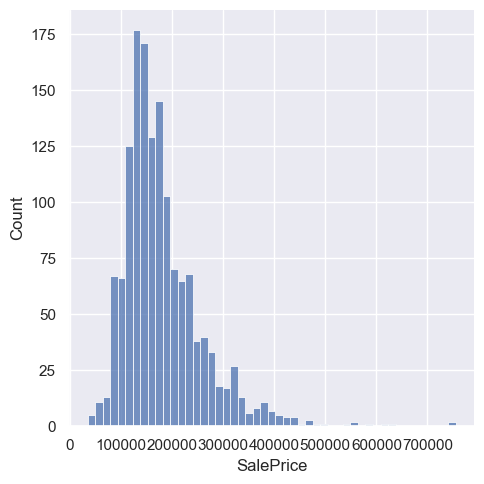

In [1161]:
sns.displot(house_price.SalePrice)
plt.show()

In [1162]:
house_price['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

Cleanup

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [1163]:
# all numeric (float and int) variables in the dataset
house_price_numeric = house_price.select_dtypes(include=['float64', 'int64'])
house_price_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [1164]:
# dropping Id column
house_price_numeric = house_price_numeric.drop(['Id',], axis=1)
house_price_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [1165]:
#Log Transformation
house_price['SalePrice']=np.log1p(house_price['SalePrice'])

In [1166]:
# correlation matrix
cor = house_price_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

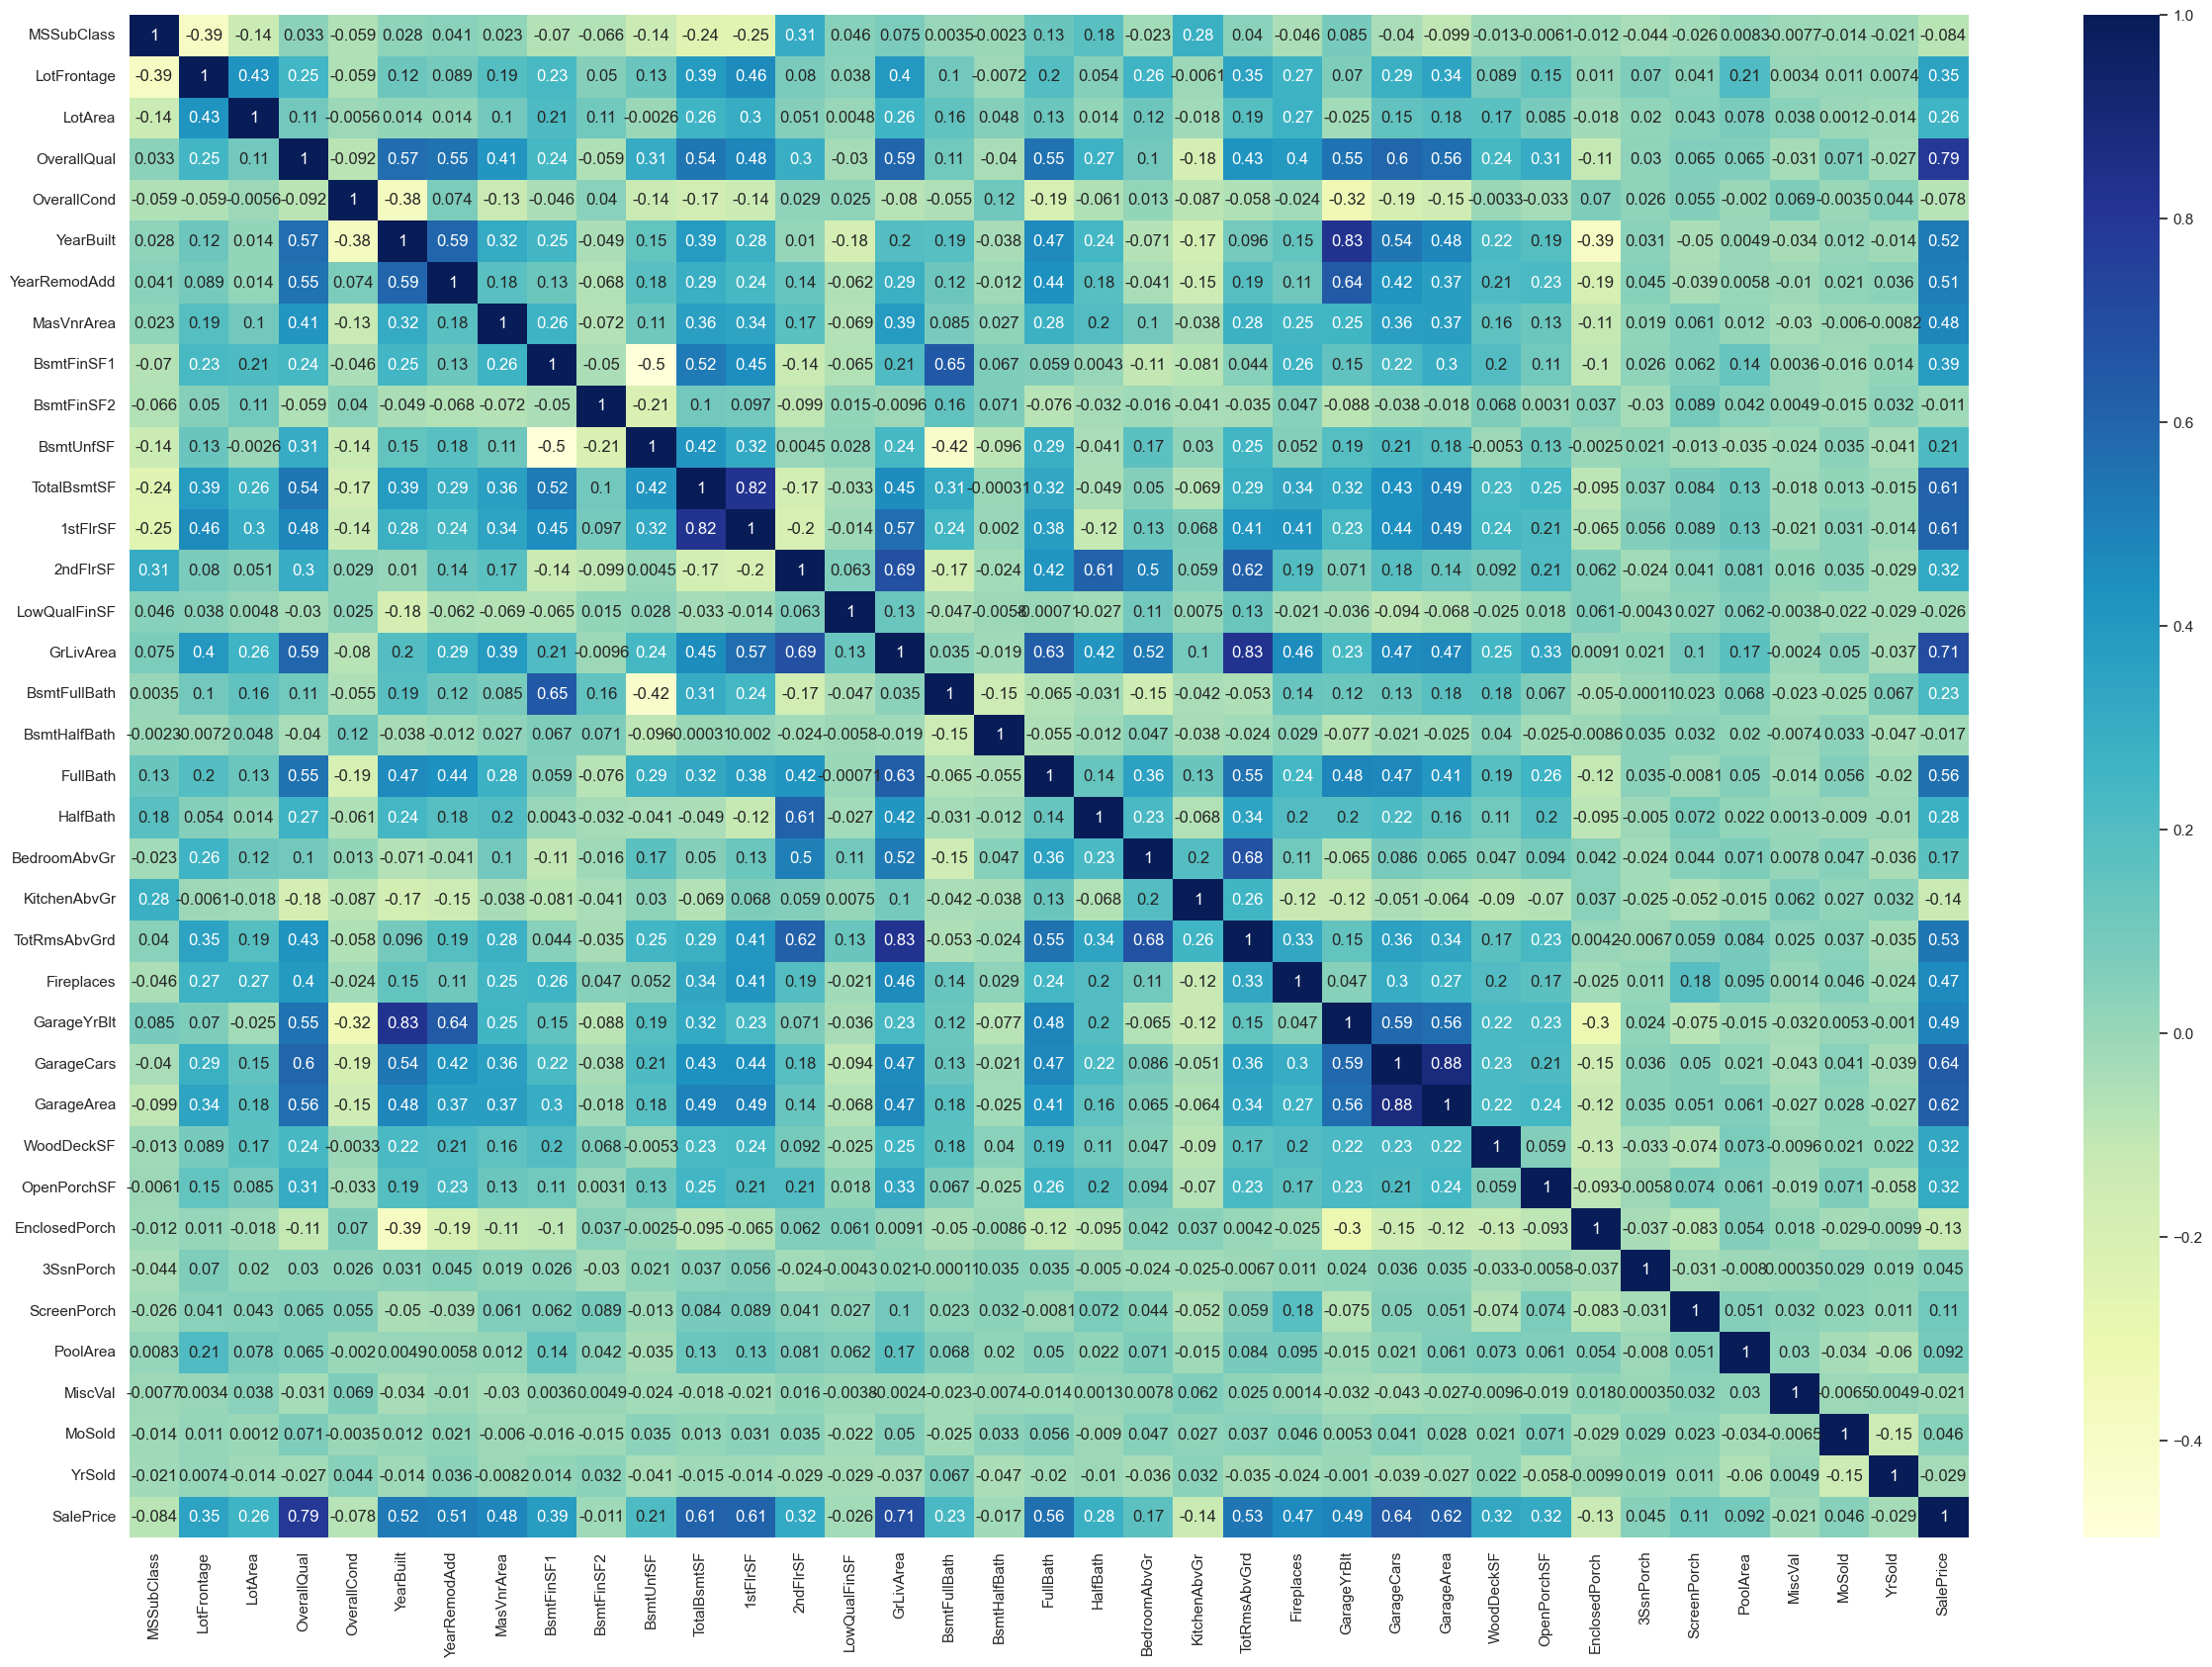

In [1167]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### 2. Data Cleaning

Impute null categorical values with none

In [1168]:
def disp_nullpercent():
    house_price.columns[house_price.isnull().any()]
    null_percent = house_price.isnull().sum()/len(house_price)*100
    print(null_percent[null_percent>0].sort_values())

In [1169]:
disp_nullpercent()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


In [1170]:
# Imputing null values for categorical features
categorical_values = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in categorical_values:
    house_price[col].fillna("none", inplace=True)

In [1171]:
disp_nullpercent()

Electrical      0.068493
MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64


In [1172]:
# Imputing null values for numerical features

house_price["Electrical"].dropna(inplace=True)
house_price['LotFrontage'] = house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_price["GarageYrBlt"].fillna(house_price["GarageYrBlt"].median(), inplace=True)
house_price["MasVnrArea"].fillna(house_price["MasVnrArea"].median(), inplace=True)

Removing correlated variables

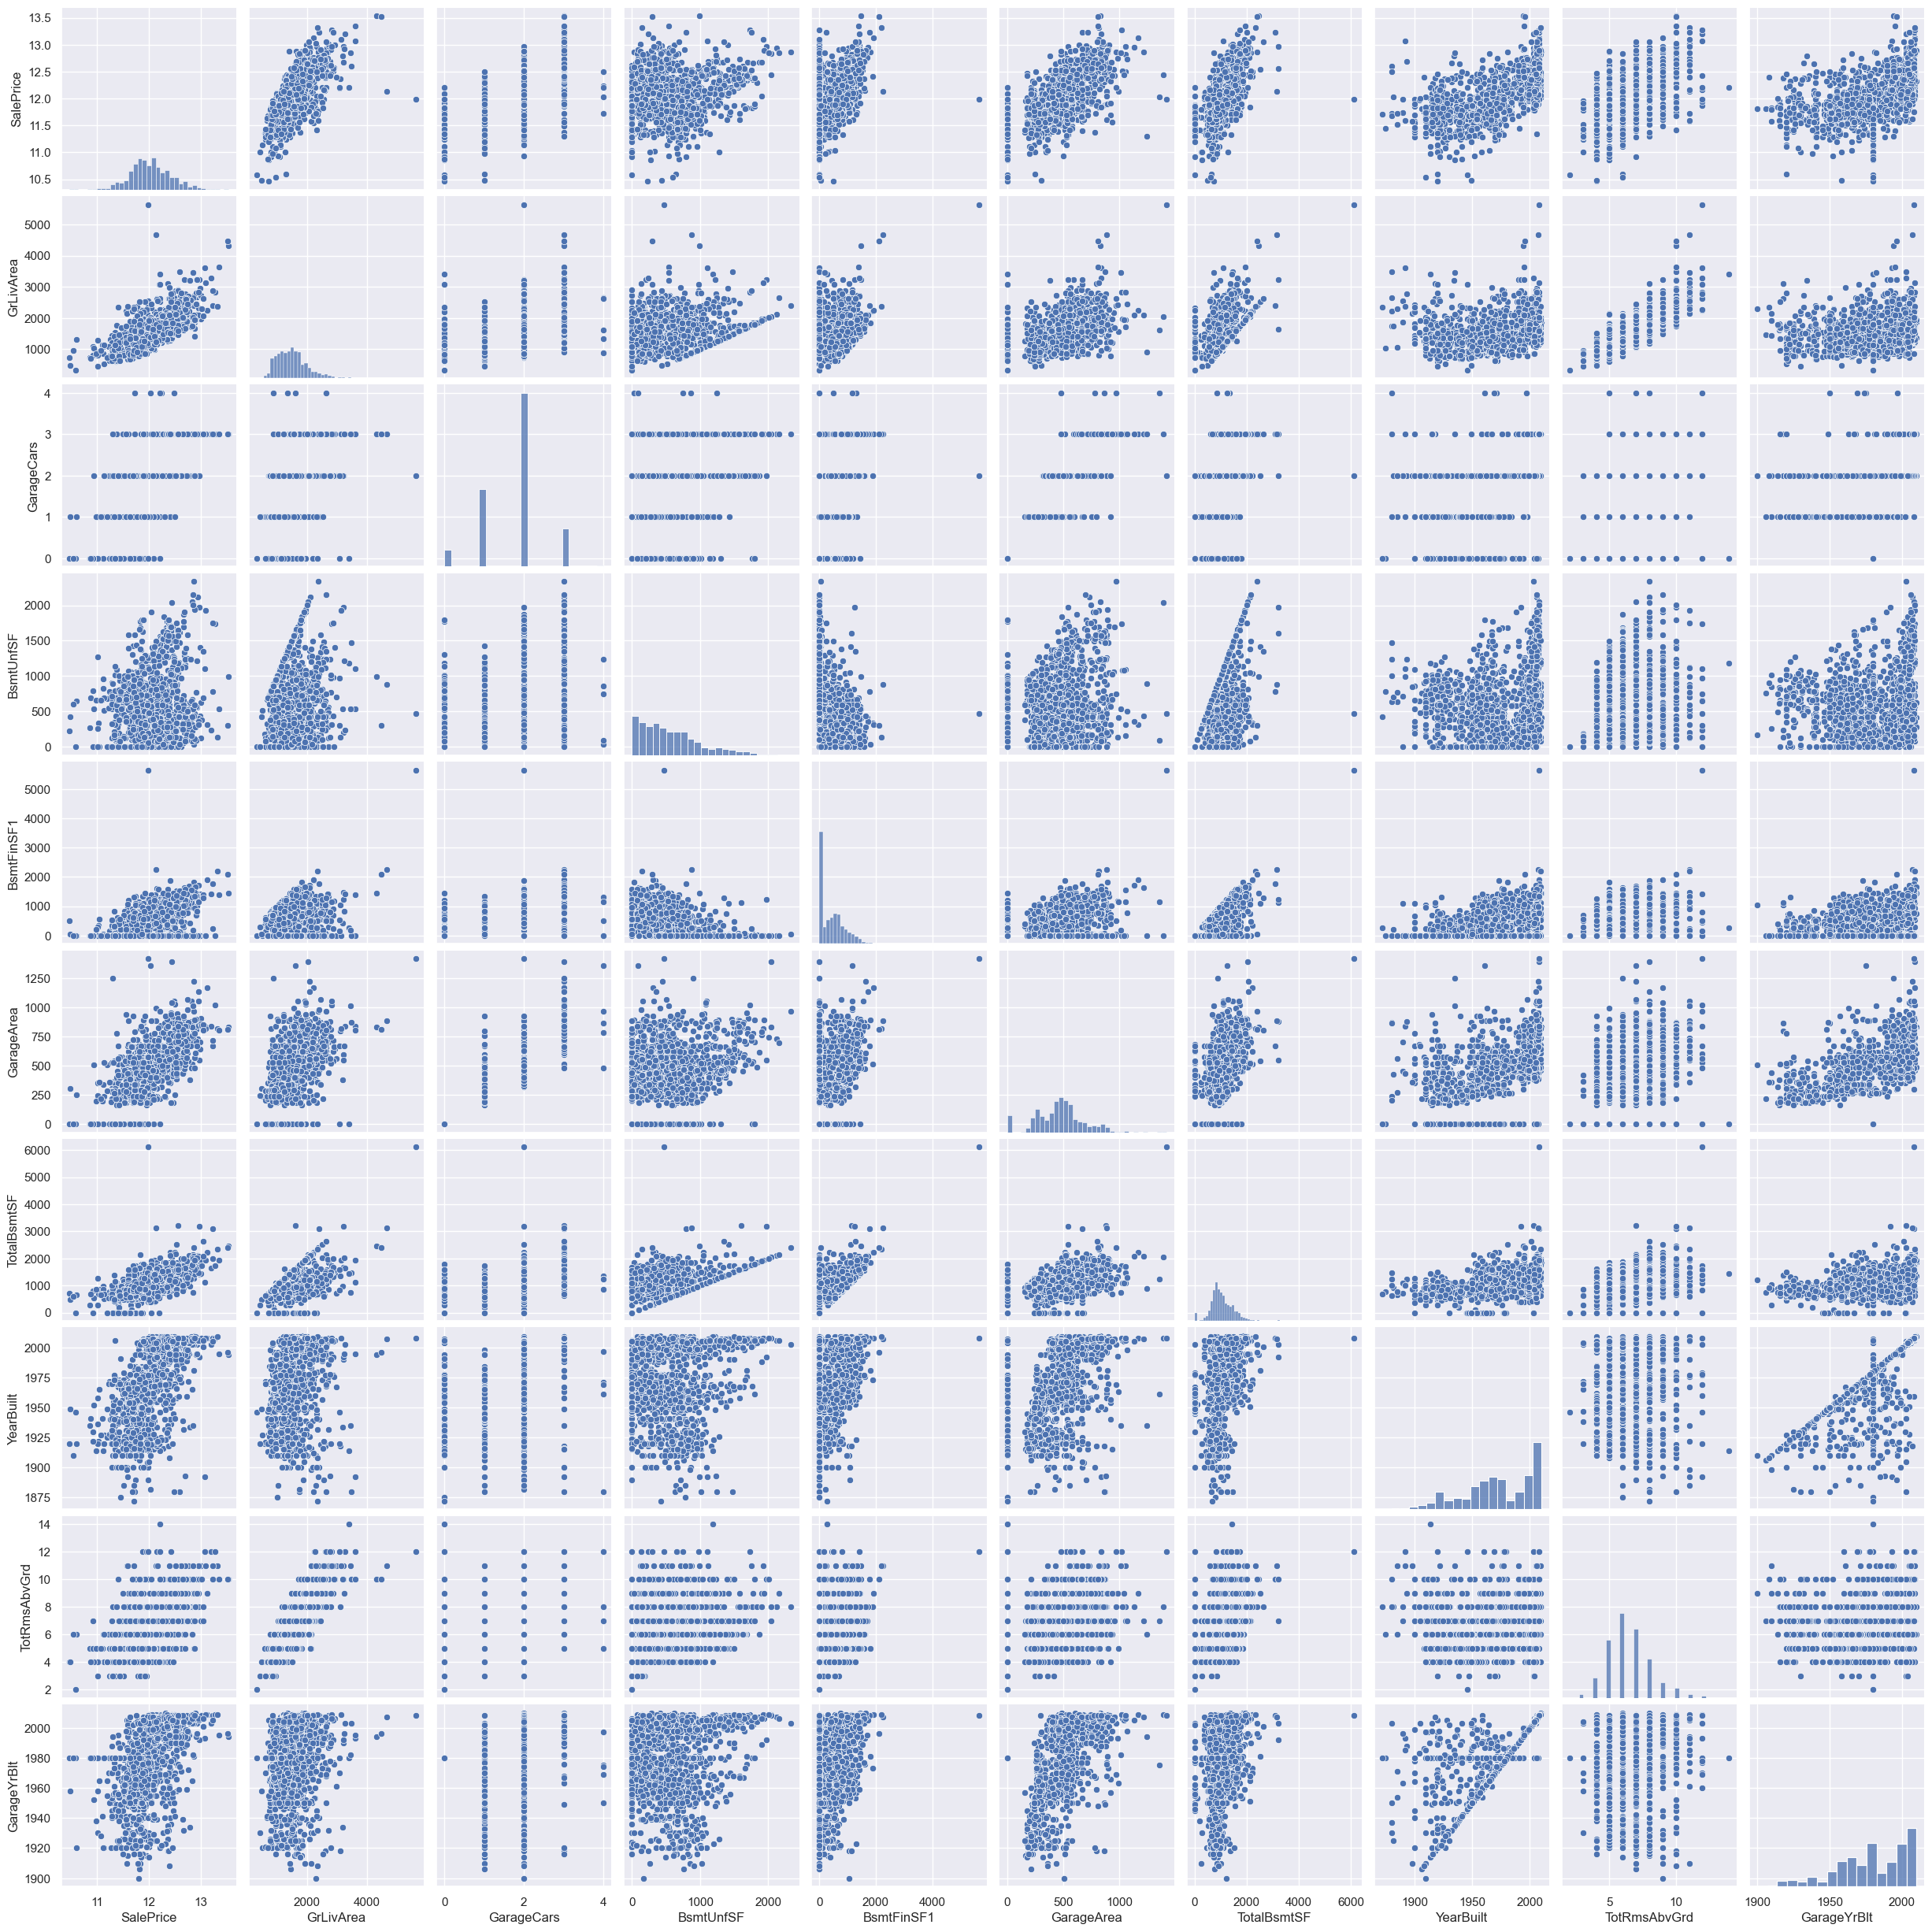

In [1173]:
# Pair plot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house_price[cols], size = 2.5)
plt.show()

Drop columns with no impact

In [1174]:
house_price = house_price.drop(['GarageCars'], axis = 1)
house_price = house_price.drop(['BsmtUnfSF'], axis = 1)
house_price = house_price.drop(['TotRmsAbvGrd'], axis = 1)
house_price = house_price.drop(['GarageYrBlt'], axis = 1)    

house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   none  none        none       0      2   
1         Lvl    AllPub  ...        0   none  none        none       0      5   
2         Lvl    AllPub  ...        0   none  none        none       0      9   
3         Lvl    AllPub  ...        0   none  none        none       0      2   
4         Lvl    AllPub  ...        0   none  none        none       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247699  
1   2007        WD         Normal  12.109016  
2   2008        WD         Normal  12.317171  
3   2006        WD        Abnorml  11.849405  
4   2008        WD         Normal  12.429220  

[5 rows x 77 columns]

Analyse numerical features

In [1175]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

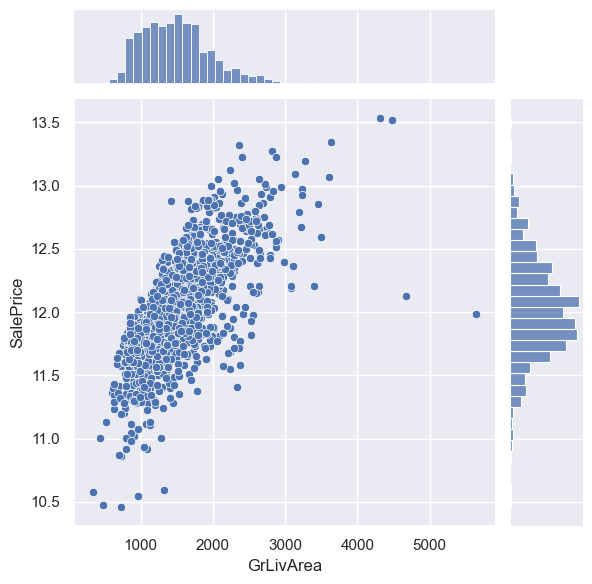

In [1176]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_price)
plt.show()

In [1177]:
house_price = remove_outliers(house_price,'GrLivArea')

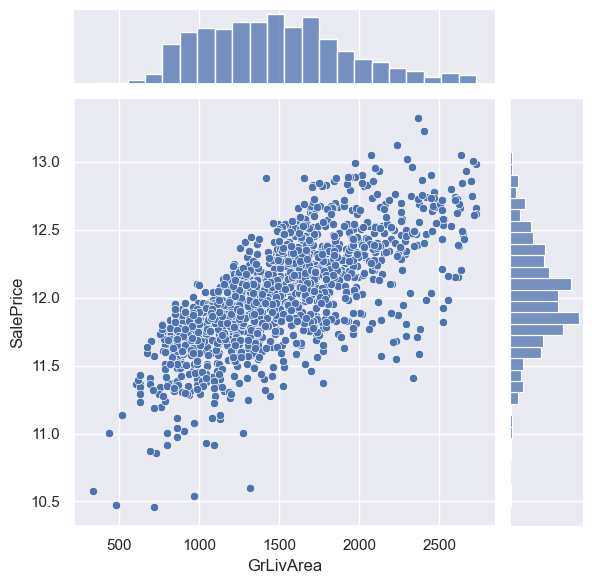

In [1178]:
sns.jointplot(x = house_price['GrLivArea'], y = house_price['SalePrice'])
plt.show()

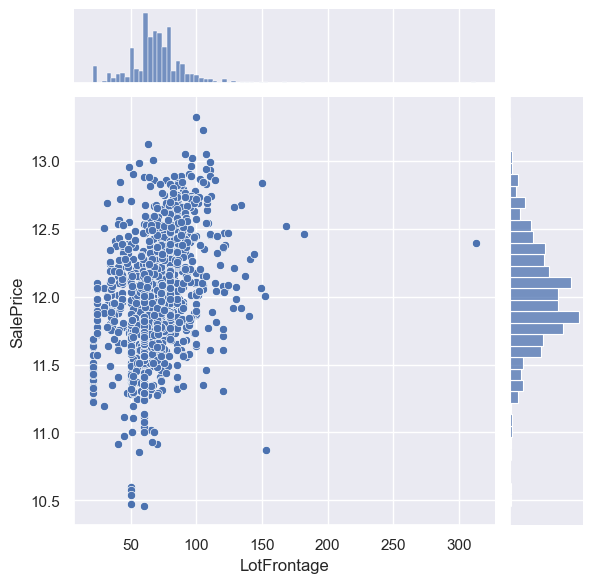

In [1179]:
sns.jointplot(x = house_price['LotFrontage'], y = house_price['SalePrice'])
plt.show()

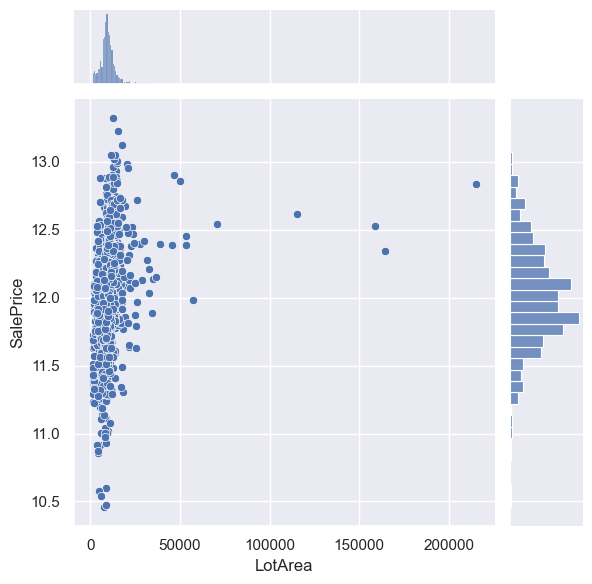

In [1180]:
sns.jointplot(x = house_price['LotArea'], y = house_price['SalePrice'])
plt.show()

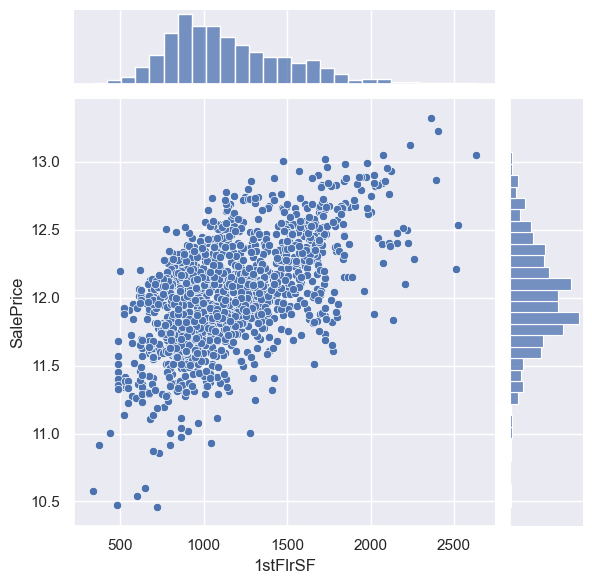

In [1181]:
sns.jointplot(x = house_price['1stFlrSF'], y = house_price['SalePrice'])
plt.show()

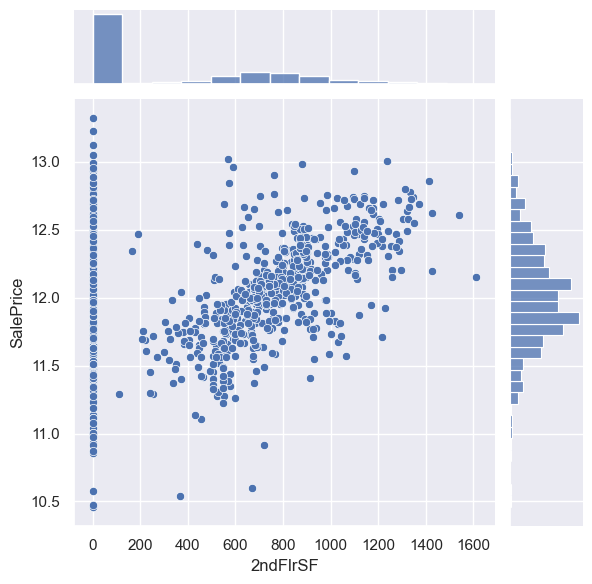

In [1182]:
sns.jointplot(x = house_price['2ndFlrSF'], y = house_price['SalePrice'])
plt.show()

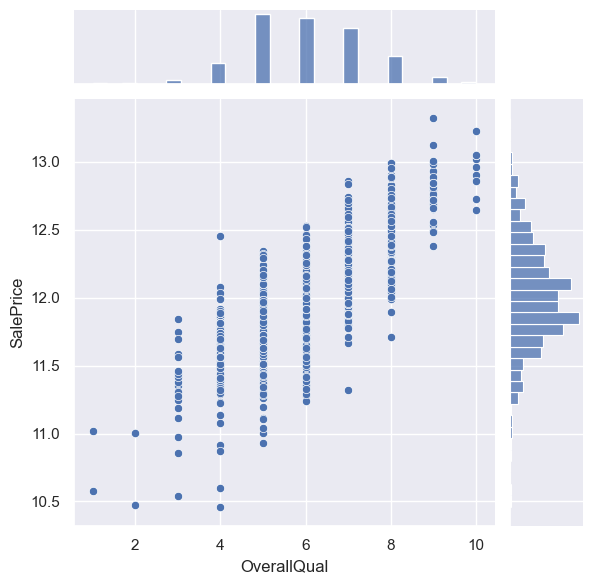

In [1183]:
sns.jointplot(x = house_price['OverallQual'], y = house_price['SalePrice'])
plt.show()

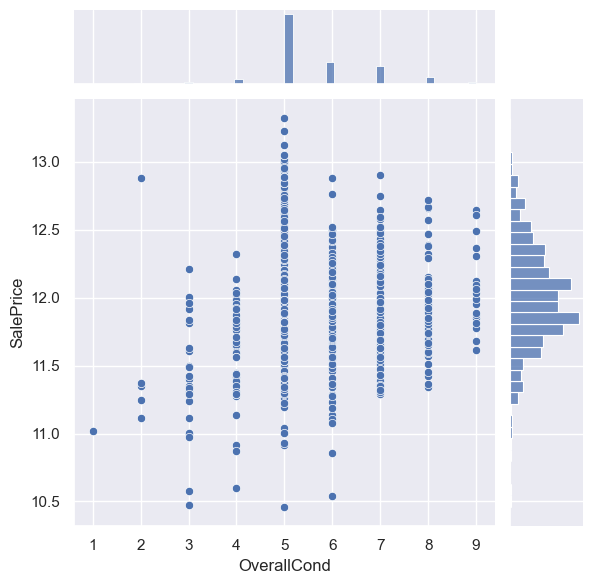

In [1184]:
sns.jointplot(x=house_price['OverallCond'], y = house_price['SalePrice'])
plt.show()

Add PropertyAge instead of YrSold and YrBuilt

In [1185]:
# PropAge -  Property Age from yearsold - yearbuilt
house_price['PropertyAge'] = (house_price['YrSold'] - house_price['YearBuilt'])
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...   none  none        none       0      2   2008   
1         Lvl    AllPub  ...   none  none        none       0      5   2007   
2         Lvl    AllPub  ...   none  none        none       0      9   2008   
3         Lvl    AllPub  ...   none  none        none       0      2   2006   
4         Lvl    AllPub  ...   none  none        none       0     12   2008   

  SaleType  SaleCondition  SalePrice  PropertyAge  
0       WD         Normal  12.247699            5  
1       WD         Normal  12.109016           31  
2       WD         Normal  12.317171            7  
3       WD        Abnorml  11.849405           91  
4       WD         Normal  12.429220            8  

[5 rows x 78 columns]

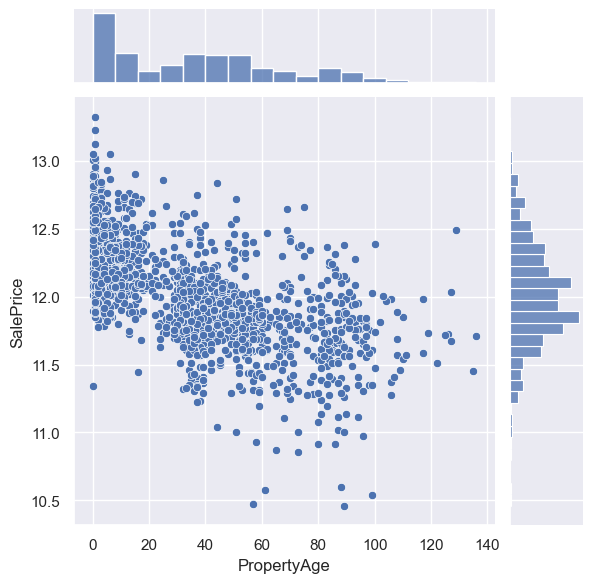

In [1186]:
# PropAge vs SalePrice
sns.jointplot(x = house_price['PropertyAge'], y = house_price['SalePrice'])
plt.show()

In [1187]:
house_price = house_price.drop(['MoSold'], axis = 1)
house_price = house_price.drop(['YrSold'], axis = 1)
house_price = house_price.drop(['YearBuilt'], axis = 1)
house_price = house_price.drop(['YearRemodAdd'], axis = 1)
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   none  none        none   
1         Lvl    AllPub  ...           0        0   none  none        none   
2         Lvl    AllPub  ...           0        0   none  none        none   
3         Lvl    AllPub  ...           0        0   none  none        none   
4         Lvl    AllPub  ...           0        0   none  none        none   

  MiscVal SaleType  SaleCondition  SalePrice PropertyAge  
0       0       WD         Normal  12.247699           5  
1       0       WD         Normal  12.109016          31  
2       0       WD         Normal  12.317171           7  
3       0       WD        Abnorml  11.849405          91  
4       0       WD         Normal  12.429220           8  

[5 rows x 74 columns]

In [1188]:
house_price.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [1189]:
house_price.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

Removing columns where the value is constant

In [1190]:
house_price = house_price.drop(['Street'], axis = 1)
house_price = house_price.drop(['Utilities'], axis = 1)

In [1191]:
house_price = house_price.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [1193]:
# dropping Id
house_price = house_price.drop(['Id'], axis=1)
house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  3SsnPorch  \
0       Gtl      CollgCr       Norm  ...          61             0          0   
1       Gtl      Veenker      Feedr  ...           0             0          0   
2       Gtl      CollgCr       Norm  ...          42             0          0   
3       Gtl      Crawfor       Norm  ...          35           272          0   
4       Gtl      NoRidge       Norm  ...          84             0          0   

   ScreenPorch PoolArea MiscFeature SaleType SaleCondition  SalePrice  \
0            0        0        none       WD        Normal  12.247699   
1            0        0        none       WD        Normal  12.109016   
2            0        0        none       WD        Normal  12.317171   
3            0        0        none       WD       Abnorml  11.849405   
4            0        0        none       WD        Normal  12.429220   

  PropertyAge  
0           5  
1          31  
2           7  
3          91  
4           8  

[5 rows x 62 columns]

In [1194]:
house_price.shape

(1429, 62)

### 3. Data preparation

In [1195]:
house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  3SsnPorch  \
0       Gtl      CollgCr       Norm  ...          61             0          0   
1       Gtl      Veenker      Feedr  ...           0             0          0   
2       Gtl      CollgCr       Norm  ...          42             0          0   
3       Gtl      Crawfor       Norm  ...          35           272          0   
4       Gtl      NoRidge       Norm  ...          84             0          0   

   ScreenPorch PoolArea MiscFeature SaleType SaleCondition  SalePrice  \
0            0        0        none       WD        Normal  12.247699   
1            0        0        none       WD        Normal  12.109016   
2            0        0        none       WD        Normal  12.317171   
3            0        0        none       WD       Abnorml  11.849405   
4            0        0        none       WD        Normal  12.429220   

  PropertyAge  
0           5  
1          31  
2           7  
3          91  
4           8  

[5 rows x 62 columns]

In [1196]:
# categorize columns into numerical and categorical
types = house_price.dtypes
numeric_type = types[(types == 'int64') | (types == float)]
categorical_type = types[types == object]

In [1197]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [1198]:
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropertyAge']


In [1199]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


Add dummy columns for categorical

In [1200]:
house_price = pd.get_dummies(house_price, drop_first=True )
house_price.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 211 columns]

Create independent variable X and dependent variable y

In [1202]:
X = house_price.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 210 columns]

In [1203]:
y = house_price['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Split into test and train

In [1204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [1206]:
scaler = StandardScaler()
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']

X_train[cols] = scaler.fit_transform(X_train[cols])

X_test[cols] = scaler.fit_transform(X_test[cols])

In [1207]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
11      1.323938   -0.300737     0.345478  0.113320  ...               0   
1070    0.360916   -0.300737     0.030191 -0.267693  ...               0   
513    -0.223442   -0.300737     0.119563 -0.176705  ...               0   
467    -0.106571   -0.300737    -0.764234 -0.722635  ...               0   
993    -1.008820   -0.300737    -0.709617 -1.115022  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
11                 0             1             0            0   
1070               0             0             0            1   
513                0             0             0            1   
467                0             0             0            1   
993                0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
11                        0                     0                     0   
1070                      0                     0                     0   
513                       0                     0                     0   
467                       0                     0                     0   
993                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
11                       0                      1  
1070                     1                      0  
513                      1                      0  
467                      1                      0  
993                      0                      1  

[5 rows x 210 columns]

In [1208]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  ...   
335    -0.606456    1.881258    0.620602     1.075768  1.258064  ...   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718  ...   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  ...   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
461                0               0             0             0            1   
335                0               0             0             0            1   
200                0               0             0             0            1   
214                0               0             0             0            1   
1003               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
461                       0                     0                     0   
335                       0                     0                     0   
200                       0                     0                     0   
214                       0                     0                     0   
1003                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
461                      1                      0  
335                      1                      0  
200                      1                      0  
214                      1                      0  
1003                     1                      0  

[5 rows x 210 columns]

### 4. Model building and evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [1209]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1210]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.6095174877768
[-1.23263399e-02  7.25772529e-03  2.99954997e-02  5.84103228e-02
  4.90740849e-02 -2.89201367e-03  3.13881799e-02  6.16394652e-03
  4.01870458e-02 -8.90900828e+10 -1.04626034e+11 -1.01681766e+10
  1.13193497e+11  1.03696414e-02 -4.63365612e-04  6.86108609e-03
  1.15953726e-02  1.24218144e-03 -2.68343116e-03  1.42252243e-03
  2.26777411e-02  1.39944220e-02  2.42395454e-04  1.23117689e-02
  5.36849644e-03  1.48160176e-02  8.08681081e-03 -6.64551007e-02
  3.82079462e-01  3.32620971e-01  3.13603751e-01  2.86467532e-01
  3.56574482e-03 -2.97161651e-02  1.47194741e-03  1.16383862e-02
 -2.24594017e-02  2.86012093e-03  1.40656563e-02 -3.02266625e-02
 -1.03358970e-01 -2.60703013e-02  1.79726513e-02 -9.11226117e-02
 -5.85614253e-02 -5.64573374e-02 -3.04405284e-02  6.13604381e-03
 -3.14251103e-02  9.22565359e-02 -9.91082459e-02 -2.92067828e-02
 -8.33446241e-02 -1.79677805e-01 -7.07942754e-02 -5.78004677e-02
  2.82160387e-02 -5.53496308e-02  1.96584612e-02  3.26464355e-02
 -9.1952

In [1211]:
from sklearn.metrics import r2_score, mean_squared_error

In [1212]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9397593597721878
-8.607928147668053e+19
8.99034270407985
5.281492484293852e+21
0.00899034270407985
1.231117129206026e+19


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [1213]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1215]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [1224]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.01324647  0.01187671  0.02132006  0.07462475  0.05540679  0.00190577
  0.03244157  0.00764898  0.03908634  0.0398098   0.0439221   0.00238666
  0.07214479  0.01281941 -0.00110362  0.01187803  0.01420899 -0.00122823
 -0.00720926  0.00864217  0.02341672  0.01314507 -0.00112846  0.0108178
  0.00496422  0.01352084  0.00996111 -0.06875152  0.03650738  0.0147927
  0.04338355 -0.00509685  0.0016501  -0.00673476 -0.00375654  0.01513167
 -0.00717235  0.00254235  0.01555104 -0.0052012  -0.00828021 -0.01857432
  0.00447458 -0.01106021 -0.0021521  -0.00613042  0.02163234  0.02003015
 -0.00584944  0.07281783 -0.03014009 -0.01034457 -0.04976725 -0.03399572
 -0.02147617 -0.00571741  0.00467073 -0.01425877  0.00769563  0.0208907
 -0.02228824 -0.01484214  0.00119767 -0.00443591  0.02700135  0.04068102
 -0.00536606  0.01226098 -0.0005188   0.04687265 -0.01181774  0.00951107
 -0.02590793  0.01816645  0.00237212  0.00093426  0.01285077  0.00578351
 -0.03146892  0.00466896  0.00342072 -0.00475646 -0.01

In [1225]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9272757940609146
0.9100087351460882
10.853396175769731
5.521516685833297
0.010853396175769732
0.012870668265345681


## Lasso

In [1226]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1227]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [1228]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [1229]:
lasso.coef_

array([-9.92333429e-03,  1.27702721e-02,  1.97115656e-02,  9.24447077e-02,
        5.68911140e-02,  0.00000000e+00,  3.90404890e-02,  5.02942681e-03,
        3.83847414e-02,  6.73775167e-04,  0.00000000e+00, -2.47621532e-03,
        1.26934402e-01,  1.22618666e-02, -0.00000000e+00,  4.38811246e-03,
        6.86874078e-03, -4.14345134e-03, -7.98333452e-03,  1.38670483e-02,
        3.15316112e-02,  1.23661517e-02,  0.00000000e+00,  6.19480128e-03,
        4.35608928e-03,  1.22560607e-02,  6.79228577e-03, -8.43924184e-02,
        6.75867452e-04,  0.00000000e+00,  3.46857632e-02, -5.90888518e-03,
        0.00000000e+00, -0.00000000e+00, -3.25267238e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.22252728e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.84377212e-02, -0.00000000e+00, -0.00000000e+00,
       -1.92378282e-02, -

In [1230]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9122051184016314
0.9031718080740088
13.102551205440815
5.941004143528155
0.013102551205440814
0.013848494507058636


In [1231]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.397594e-01          0.927276          0.912205
1   R2 Score (Test)      -8.607928e+19          0.910009          0.903172
2       RSS (Train)       8.990343e+00         10.853396         13.102551
3        RSS (Test)       5.281492e+21          5.521517          5.941004
4       MSE (Train)       9.481742e-02          0.104180          0.114466
5        MSE (Test)       3.508728e+09          0.113449          0.117680